In [1]:
import cv2 
import os
import easygui 
import sys
import imageio 

import numpy as np 
import matplotlib.pyplot as plt
import tkinter as tk

from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image

In [2]:
top=tk.Tk()
top.geometry('500x300')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))


In [3]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

### Read 

In [4]:
def cartoonify(ImagePath):    
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
   
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
   
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))

    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()

### Save Image

In [5]:
def save(ReSized6, ImagePath):
    
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

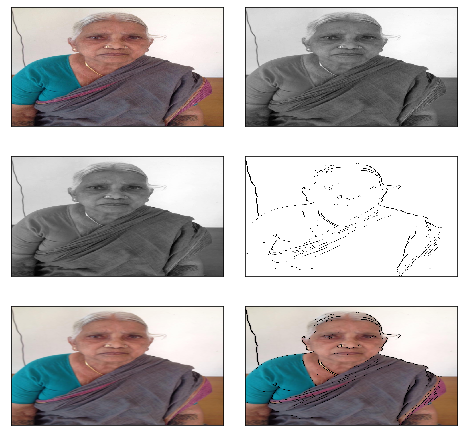

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-4-ec19f7dabc39>", line 35, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
  File "<ipython-input-5-e6d9e2601afa>", line 9, in save
    tk.messagebox.showinfo(title=None, message=I)
AttributeError: module 'tkinter' has no attribute 'messagebox'


In [6]:
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()